# Decision Trees

## Imports

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import  DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import validation_curve
from graphviz import Source
from IPython.display import Image

## Read data

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('data/dataset.csv')
df = df[df['genre'].notnull()]
df.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60,pop
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,0.662,0.272,0,-18.883,1,0.0313,0.3600,0.228000,0.0963,0.591,143.507,134360,4,47.82155,7,0,60,jazz
9,I Can Hear Music,The Beach Boys,spotify:track:1hcMfYTsRTC4hIKbfosxjz,0.511,0.603,2,-7.637,1,0.0280,0.0385,0.000002,0.1420,0.685,128.336,157293,4,43.36534,9,1,60,pop
11,Ride Away,Roy Orbison,spotify:track:1nxSCulSg5AtmExqgHPPC0,0.520,0.411,9,-12.411,1,0.0315,0.7860,0.001200,0.1460,0.350,120.290,207573,4,37.54527,9,1,60,pop
13,P.T. 109,Jimmy Dean,spotify:track:3vfNUZeVUiwWXwsEXjagqL,0.746,0.666,2,-10.408,1,0.1460,0.5430,0.000000,0.0488,0.840,94.024,192427,4,78.59848,5,1,60,country


<AxesSubplot:ylabel='genre'>

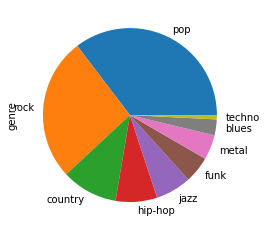

In [3]:
df.genre.value_counts().plot.pie()

## Encode categorical features

In [4]:
le = LabelEncoder()
df_encoded=df[
    ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
     'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo',
     'duration_ms', 'chorus_hit', 'decade', 'genre']
].copy()
df_encoded['decade'] = le.fit_transform(df_encoded['decade'])
df_encoded['genre'] = le.fit_transform(df_encoded['genre'])
df_encoded.head(5)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,decade,genre
1,0.498,0.505,3,-12.475,1,0.0337,0.107000,0.0180,0.1760,0.797,101.801,213613,48.82510,2,6
6,0.662,0.272,0,-18.883,1,0.0313,0.228000,0.3600,0.0963,0.591,143.507,134360,47.82155,2,4
9,0.511,0.603,2,-7.637,1,0.0280,0.000002,0.0385,0.1420,0.685,128.336,157293,43.36534,2,6
11,0.520,0.411,9,-12.411,1,0.0315,0.001200,0.7860,0.1460,0.350,120.290,207573,37.54527,2,6
13,0.746,0.666,2,-10.408,1,0.1460,0.000000,0.5430,0.0488,0.840,94.024,192427,78.59848,2,1


## Train test split

In [5]:
x_set = df_encoded.drop(['genre'], axis=1)
y_set = df_encoded['genre']

x_train, x_test, y_train, y_test = train_test_split(x_set, y_set)

## Fit model and visualize feature importances

In [6]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=8)
model.fit(x_train, y_train)
y_test_predict = model.predict(x_test)
feature_importances = model.feature_importances_
feature_importances

array([0.17594166, 0.04648863, 0.00087119, 0.01908176, 0.0134239 ,
       0.20186316, 0.10042499, 0.18355226, 0.00652008, 0.02283827,
       0.02190495, 0.05405171, 0.00214689, 0.15089054])

<AxesSubplot:>

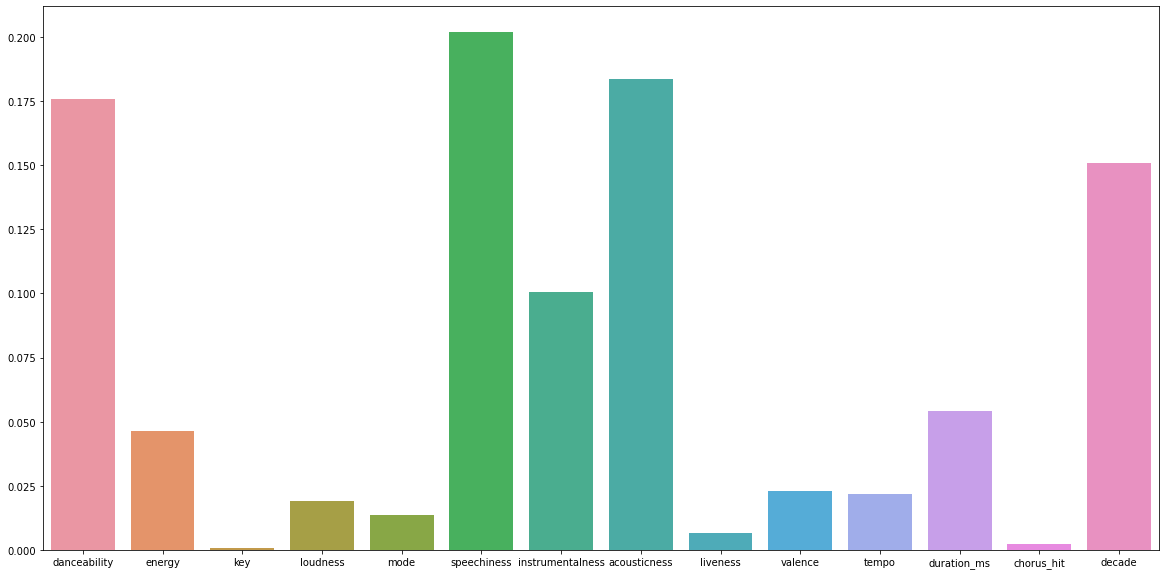

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=x_set.columns, y=feature_importances, ax=ax)

## Train test accuracies

In [8]:
y_train_predict = model.predict(x_train)
print(f'Train accuracy: {accuracy_score(y_train, y_train_predict)}')
print(f'Test accuracy: {accuracy_score(y_test, y_test_predict)}')

Train accuracy: 0.5622455679579776
Test accuracy: 0.5020681504825685


## Confusion matrix

In [9]:
conf_matrix=pd.crosstab(le.inverse_transform(y_test), le.inverse_transform(y_test_predict))
conf_matrix

col_0,blues,country,funk,hip-hop,jazz,metal,pop,rock,techno
row_0,,,,,,,,,
blues,11,2,2,1,15,1,80,21,0
country,14,228,3,6,7,2,242,39,0
funk,3,1,32,15,9,1,154,42,0
hip-hop,1,10,0,215,1,4,128,10,0
jazz,13,7,7,1,88,2,162,31,2
metal,0,2,0,5,1,144,18,69,4
pop,13,129,19,91,27,13,1201,350,2
rock,13,61,16,8,31,43,543,626,2
techno,0,1,1,5,1,0,12,9,4


<AxesSubplot:xlabel='col_0', ylabel='row_0'>

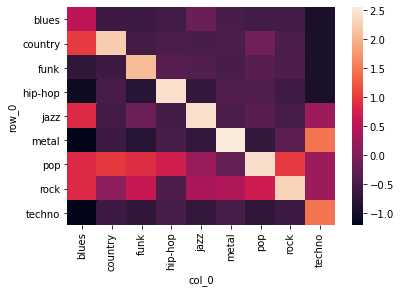

In [10]:
sns.heatmap((conf_matrix - conf_matrix.mean()) / conf_matrix.std())

From the heatmap we can see that pop and rock genres have the most misclassifications with other genres. We can also see that blues and techno genres have low correct classifications

## Validation curve

In [11]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [12]:
def plot_validation_curve(estimator, x, y, *, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator, x, y, param_name=param_name, param_range=param_range, cv=cv
    )
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)
    plt.title('Validation Curve for Decision Tree Classifier')
    plt.xlabel('max_depth')
    plt.ylabel('Score')
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label='Training score',
                 color='darkorange', lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color='darkorange', lw=lw)
    plt.plot(param_range, test_scores_mean, label='Test score',
                 color='navy', lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color='navy', lw=lw)
    plt.xticks(param_range)
    plt.legend(loc='best')

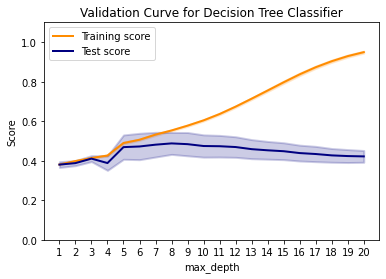

In [13]:
plot_validation_curve(
        DecisionTreeClassifier(),
        x_set,
        y_set,
        param_name='max_depth',
        param_range=list(range(1, 21)),
        cv=20
)

From the validation curve we can make an estimate that we will get the best model performance for DecisionTree with a max_depth in range (5, 10), and after that the test score slowly falls off as we observe overfitting

## Removing pop, rock, blues and techno (Extra)

Since pop and rock genres are responsible for the most misclassifications, and blues and techno have a low classification rate, let's test out a model with those genres removed. This part is just to test out the model without problematic genres, it doesn't show realistic performance!

In [14]:
enc_to_genre = dict(zip(y_set.unique(), le.inverse_transform(y_set.unique())))
enc_to_genre

{6: 'pop',
 4: 'jazz',
 1: 'country',
 7: 'rock',
 0: 'blues',
 2: 'funk',
 3: 'hip-hop',
 5: 'metal',
 8: 'techno'}

In [15]:
mask = (y_set != 6) & (y_set != 7) & (y_set != 8) & (y_set != 0)

<AxesSubplot:ylabel='genre'>

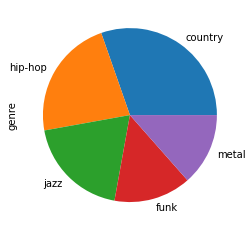

In [16]:
pd.DataFrame(
    {'genre': np.vectorize(enc_to_genre.get)(y_set[mask])}
)['genre'].value_counts().plot.pie()

### Validation curve

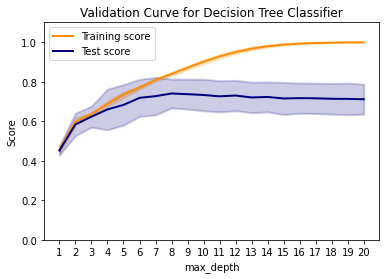

In [17]:
plot_validation_curve(
        DecisionTreeClassifier(),
        x_set[mask],
        y_set[mask],
        param_name='max_depth',
        param_range=list(range(1, 21)),
        cv=20
)

We can see that with a max_depth somewhere around ~8 we get a mean test score of more than ~0.7

### Testing a model with max_depth=8

In [18]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_set[mask], y_set[mask])

model = DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf = model.fit(x_train_2, y_train_2)
y_test_predict_2 = model.predict(x_test_2)

In [19]:
print(f'Test accuracy: {accuracy_score(y_test_2, y_test_predict_2)}')

Test accuracy: 0.7717889908256881


#### Confusion matrix

In [20]:
conf_matrix=pd.crosstab(le.inverse_transform(y_test_2), le.inverse_transform(y_test_predict_2))
conf_matrix

col_0,country,funk,hip-hop,jazz,metal
row_0,,,,,
country,439,23,17,45,3
funk,30,172,15,27,7
hip-hop,40,13,329,8,7
jazz,62,51,11,196,12
metal,14,2,7,4,210


<AxesSubplot:xlabel='col_0', ylabel='row_0'>

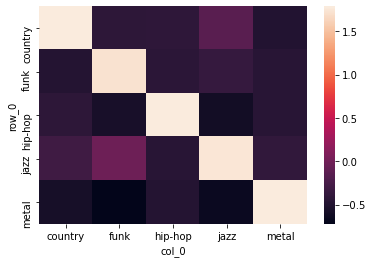

In [21]:
sns.heatmap((conf_matrix - conf_matrix.mean()) / conf_matrix.std())

We can see a much cleaner confusion matrix for this curated subset of the data

#### Graphviz visualization

This generates a really large image that can't fully render in the notepad, so open it in a new tab to be able to zoom in.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.847108 to fit


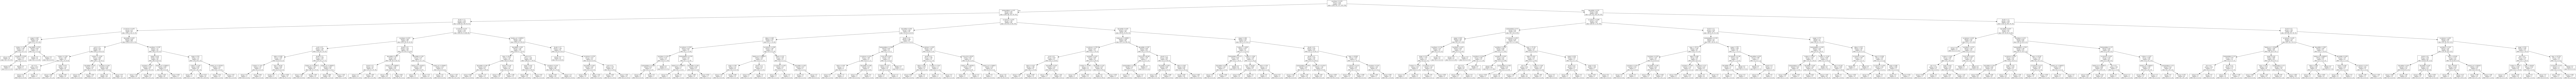

In [28]:
graph = Source(export_graphviz(clf, out_file=None, feature_names=x_set.columns))
png_bytes = graph.pipe(format='png')
Image(png_bytes)